In [190]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib.use('GTKAgg')
#import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('C:/Users/User/Desktop/insurance.csv')
charges = data['charges']
prices = data.drop('charges',axis=1)


# Success
print ('Insurance dataset has {0} data points with {1} variables each \n'.format(*data.shape))
print(data)
data.isnull().sum()


Insurance dataset has 1338 data points with 7 variables each 

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [191]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [192]:
print("Female is: 0 \n Male is: 1")
print("Smoker yes is: 1\n Smoker no is: 0")
print("Region northeast is: 0\nRegion northwest is: 1\nRegion southeast is: 2\nRegion Southwest is: 3")
data


Female is: 0 
 Male is: 1
Smoker yes is: 1
 Smoker no is: 0
Region northeast is: 0
Region northwest is: 1
Region southeast is: 2
Region Southwest is: 3


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [193]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

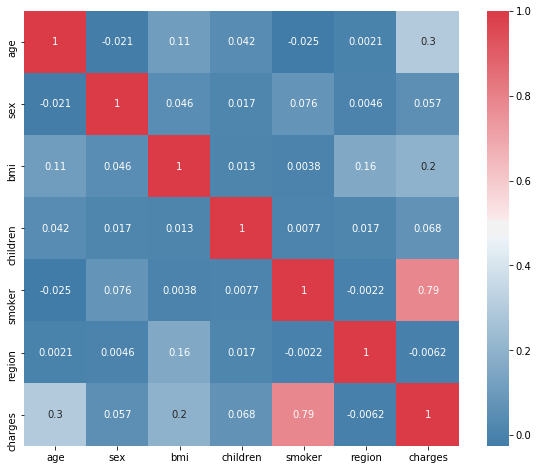

In [194]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax,annot=True)

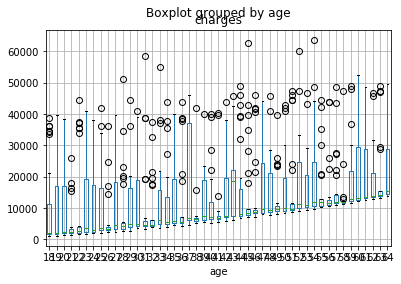

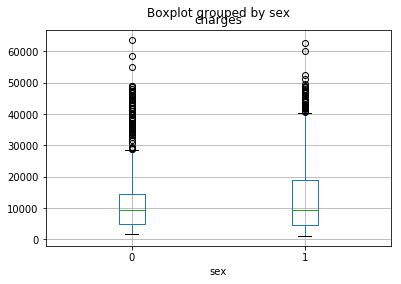

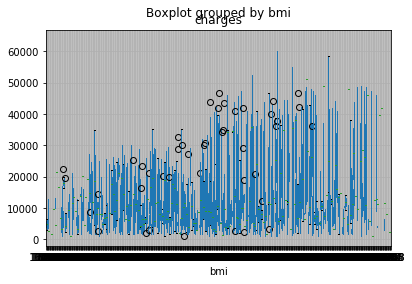

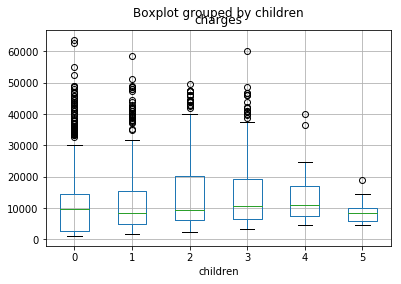

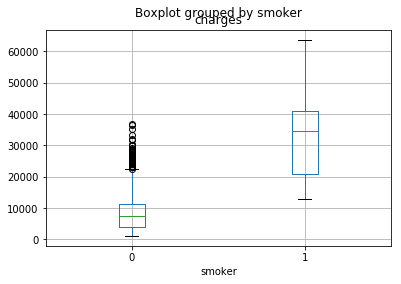

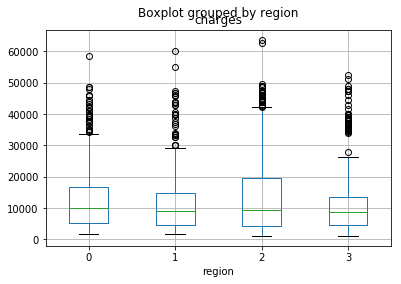

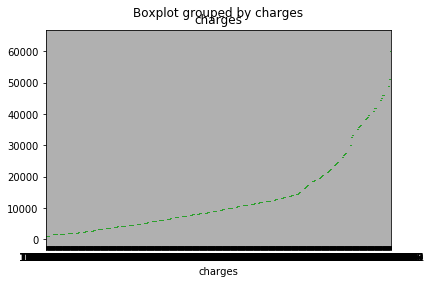

In [195]:
for x in data:
    data.boxplot(column="charges",by=x)

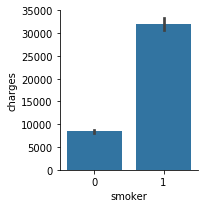

In [196]:
g = sns.FacetGrid(data)
g.map(sns.barplot, "smoker", "charges")
plt.show()

In [223]:
x = data.drop(['charges','region','sex','children'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test


y_train_pred = lr.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_pred)))
r2=r2_score(y_train,y_train_pred)

print("Model performance for training set: \n")
print("RMSE is {}".format(rmse))
print("R2 score is{}".format(r2),'\n')

y_test_pred = lr.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2=r2_score(y_test,y_test_pred)
print("Model performance for testing set: \n")
print("RMSE is {}".format(rmse))
print("R2 score is{}".format(r2),'\n')


Model performance for training set: 

RMSE is 6202.253404030965
R2 score is0.7307920456437863 

Model performance for testing set: 

RMSE is 5716.489161600825
R2 score is0.7924327534321977 



In [224]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)

forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 4527398.099, MSE test data: 23645973.999
R2 train data: 0.968, R2 test data: 0.850
